# 07 Your First Deep Learning Project in Python with Keras Step-By-Step

In [1]:
#conda update mkl

#### Source:

This practical is based on the blog post:

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

Here we are going to reproduce parts of that post.
I recommend using Anaconda Python, read the installation guide for it under Unit 7. Use Python 3.x.



### Prerequisites:
Libraries used in this tutorial:
- keras (now built into TensorFlow)
- numpy
- sklearn
- pydot

External libraries (necessary for visualization):
- https://graphviz.gitlab.io/download/

If you set up your machine at home you can remove the cell below

In [2]:
!pip install pydot
!pip install graphviz
!pip install tensorflow

#### Datasets used
Please download the following datasets and put them into the folder, where this notebook is located (i.e. your working directory):
- https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
- http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
- https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data

### Install Tensorflow:

In [3]:
import tensorflow as tf
from tensorflow import keras


In [4]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# For plotting layers
from keras.utils.vis_utils import plot_model
import pydot
import matplotlib.pyplot as plt

Using TensorFlow backend.


#### Load the Pima Indian dataset

It is a csv file with ',' as delimiter.

In [5]:
# load the dataset
dataset = loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', delimiter=',')

The variables can be summarized as follows:

Input Variables (X):

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)

Output Variables (Y):

1. Class variable (0 or 1)

# Task 0
What is the size of this dataset? Take a look at a few rows of this dataset to make sure you understand the structure of the data.

In [6]:
# Separate the dataset into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]


- The model expects rows of data with 8 variables (the input_dim=8 argument)
- The first hidden layer has 12 nodes and uses the relu activation function.
- The second hidden layer has 8 nodes and uses the relu activation function.
- The output layer has one node and uses the sigmoid activation function.

In [7]:
# define the Keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

2021-11-26 21:05:01.993261: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-26 21:05:01.994428: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [8]:
#Check your model 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


To train a neural network model you will need to specify a loss function, an optimizer, and some metrics for monitoring.

https://www.tensorflow.org/guide/keras/train_and_evaluate/

In [9]:
# compile the Keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# fit the Keras model on the dataset
history = model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
768/768 [==============================] - 1s 696us/step - loss: 8.4247 - accuracy: 0.6471
Epoch 2/150
768/768 [==============================] - 0s 122us/step - loss: 1.1789 - accuracy: 0.4961
Epoch 3/150
768/768 [==============================] - 0s 125us/step - loss: 0.8058 - accuracy: 0.5664
Epoch 4/150
768/768 [==============================] - 0s 125us/step - loss: 0.7273 - accuracy: 0.6211
Epoch 5/150
768/768 [==============================] - 0s 126us/step - loss: 0.6931 - accuracy: 0.6146
Epoch 6/150
768/768 [==============================] - 0s 123us/step - loss: 0.6662 - accuracy: 0.6484
Epoch 7/150
768/768 [==============================] - 0s 124us/step - loss: 0.6552 - accuracy: 0.6380
Epoch 8/150
768/768 [==============================] - 0s 125us/step - loss: 0.6462 - accuracy: 0.6628
Epoch 9/150
768/768 [==============================] - 0s 125us/step - loss: 0.6430 - accuracy: 0.6667
Epoch 10/150
768/768 [==============================] - 0s 125us/step - l

768/768 [==============================] - 0s 136us/step - loss: 0.4988 - accuracy: 0.7591
Epoch 80/150
768/768 [==============================] - 0s 130us/step - loss: 0.5110 - accuracy: 0.7552
Epoch 81/150
768/768 [==============================] - 0s 132us/step - loss: 0.4924 - accuracy: 0.7656
Epoch 82/150
768/768 [==============================] - 0s 138us/step - loss: 0.4958 - accuracy: 0.7708
Epoch 83/150
768/768 [==============================] - 0s 138us/step - loss: 0.5104 - accuracy: 0.7591
Epoch 84/150
768/768 [==============================] - 0s 138us/step - loss: 0.5021 - accuracy: 0.7565
Epoch 85/150
768/768 [==============================] - 0s 130us/step - loss: 0.5000 - accuracy: 0.7565
Epoch 86/150
768/768 [==============================] - 0s 133us/step - loss: 0.5171 - accuracy: 0.7539
Epoch 87/150
768/768 [==============================] - 0s 131us/step - loss: 0.5355 - accuracy: 0.7357
Epoch 88/150
768/768 [==============================] - 0s 135us/step - loss:

In [11]:
# evaluate the keras model
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

768/768 [==============================] - 0s 107us/step
Accuracy: 78.39


In [12]:
# Plot model
#plot_model(model, show_shapes=True, show_layer_names=True)
#import pydot


Text(0, 0.5, 'Cross entropy loss')

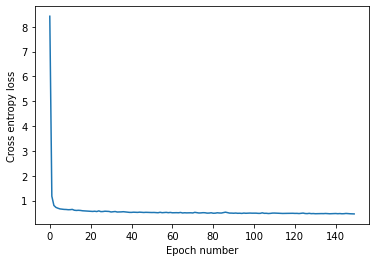

In [13]:
#Plot history
plt.plot(history.history['loss'], label='binary cross entropy loss')
plt.xlabel('Epoch number')
plt.ylabel('Cross entropy loss')

## Predictions

In [14]:
# make probability predictions with the model
predictions = model.predict(X)
# round predictions 
rounded = [round(x[0]) for x in predictions]

# Task 1
Create another model (give it a different name) with a slightly different architecture, e.g. with a different number of neurons in the two hidden layers. Specify how many neurons in each layer. Add an extra hidden layer.

In [15]:
#Please post your solution here.
#Feel free to add markdown and code cells as you need
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
tffun = 'relu'

print('The first hidden layer has 12 nodes and uses the relu activation function.')
print('The second hidden layer has 10 nodes and uses the relu activation function.')
print('The third hidden layer has 8 nodes and uses the relu activation function.')
print('The output layer has one node and uses the sigmoid activation function.')

The first hidden layer has 12 nodes and uses the relu activation function.
The second hidden layer has 10 nodes and uses the relu activation function.
The third hidden layer has 8 nodes and uses the relu activation function.
The output layer has one node and uses the sigmoid activation function.


# Task 2

Split the data into a training set (80%) and a validation set (20%), by setting the *validation_split* parameter appropriately in the Keras model. 


In [16]:
#Please post your solution here.
#Feel free to add markdown and code cells as you need
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X,Y, verbose = 0,
                    validation_split = 0.2, # split data in 80-20 sets
                    epochs = 150,
                    batch_size = 10)

# Task 3 

Visualize the performance of your model during training by using the history dictionary object (part of model.fit()). Plot training loss and validation loss against Epoch.

In [17]:
#Please post your solution here.
#Feel free to add markdown and code cells as you need
 
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=1)
history = model.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_val, y_val))

Train on 614 samples, validate on 154 samples
Epoch 1/150
614/614 [==============================] - 0s 162us/step - loss: 0.4799 - accuracy: 0.7671 - val_loss: 0.4919 - val_accuracy: 0.7597
Epoch 2/150
614/614 [==============================] - 0s 163us/step - loss: 0.4891 - accuracy: 0.7606 - val_loss: 0.4779 - val_accuracy: 0.7727
Epoch 3/150
614/614 [==============================] - 0s 162us/step - loss: 0.4736 - accuracy: 0.7736 - val_loss: 0.5144 - val_accuracy: 0.7468
Epoch 4/150
614/614 [==============================] - 0s 162us/step - loss: 0.4835 - accuracy: 0.7671 - val_loss: 0.4759 - val_accuracy: 0.7532
Epoch 5/150
614/614 [==============================] - 0s 162us/step - loss: 0.4665 - accuracy: 0.7964 - val_loss: 0.4604 - val_accuracy: 0.7857
Epoch 6/150
614/614 [==============================] - 0s 161us/step - loss: 0.4697 - accuracy: 0.7752 - val_loss: 0.4872 - val_accuracy: 0.7273
Epoch 7/150
614/614 [==============================] - 0s 160us/step - loss: 0.4541 

Epoch 57/150
614/614 [==============================] - 0s 161us/step - loss: 0.4499 - accuracy: 0.7899 - val_loss: 0.5025 - val_accuracy: 0.7727
Epoch 58/150
614/614 [==============================] - 0s 159us/step - loss: 0.4437 - accuracy: 0.7801 - val_loss: 0.4889 - val_accuracy: 0.7727
Epoch 59/150
614/614 [==============================] - 0s 157us/step - loss: 0.4477 - accuracy: 0.7769 - val_loss: 0.4943 - val_accuracy: 0.7597
Epoch 60/150
614/614 [==============================] - 0s 157us/step - loss: 0.4385 - accuracy: 0.7866 - val_loss: 0.4813 - val_accuracy: 0.7792
Epoch 61/150
614/614 [==============================] - 0s 158us/step - loss: 0.4415 - accuracy: 0.8013 - val_loss: 0.4963 - val_accuracy: 0.7532
Epoch 62/150
614/614 [==============================] - 0s 158us/step - loss: 0.4561 - accuracy: 0.7752 - val_loss: 0.5302 - val_accuracy: 0.7078
Epoch 63/150
614/614 [==============================] - 0s 159us/step - loss: 0.4376 - accuracy: 0.7948 - val_loss: 0.4880 -

614/614 [==============================] - 0s 162us/step - loss: 0.4234 - accuracy: 0.8111 - val_loss: 0.5015 - val_accuracy: 0.7727
Epoch 114/150
614/614 [==============================] - 0s 159us/step - loss: 0.4230 - accuracy: 0.7850 - val_loss: 0.5072 - val_accuracy: 0.7468
Epoch 115/150
614/614 [==============================] - 0s 159us/step - loss: 0.4321 - accuracy: 0.7866 - val_loss: 0.4885 - val_accuracy: 0.7987
Epoch 116/150
614/614 [==============================] - 0s 159us/step - loss: 0.4181 - accuracy: 0.8094 - val_loss: 0.5500 - val_accuracy: 0.7532
Epoch 117/150
614/614 [==============================] - 0s 158us/step - loss: 0.4322 - accuracy: 0.7866 - val_loss: 0.4808 - val_accuracy: 0.7987
Epoch 118/150
614/614 [==============================] - 0s 158us/step - loss: 0.4316 - accuracy: 0.7948 - val_loss: 0.5139 - val_accuracy: 0.7727
Epoch 119/150
614/614 [==============================] - 0s 159us/step - loss: 0.4286 - accuracy: 0.8046 - val_loss: 0.5101 - val_ac

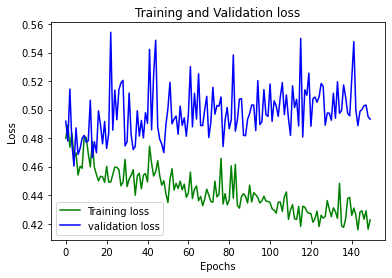

In [18]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,150)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Task 4

Using your model from *Task 1* change the activation functions and see how this affects training.

In [19]:
#Please post your solution here.
#Feel free to add markdown and code cells as you need

model = Sequential()
model.add(Dense(12, input_dim=8, activation='selu'))
model.add(Dense(10, activation='selu'))
model.add(Dense(8, activation='selu'))
model.add(Dense(1, activation='sigmoid'))
tfo = 'selu'

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, Y, epochs=150, batch_size=10)


Epoch 1/150
768/768 [==============================] - 1s 959us/step - loss: 13.6145 - accuracy: 0.3698
Epoch 2/150
768/768 [==============================] - 0s 180us/step - loss: 0.9578 - accuracy: 0.6667
Epoch 3/150
768/768 [==============================] - 0s 174us/step - loss: 0.7094 - accuracy: 0.6693
Epoch 4/150
768/768 [==============================] - 0s 183us/step - loss: 0.6703 - accuracy: 0.6680
Epoch 5/150
768/768 [==============================] - 0s 178us/step - loss: 0.6428 - accuracy: 0.6732
Epoch 6/150
768/768 [==============================] - 0s 177us/step - loss: 0.6251 - accuracy: 0.6836
Epoch 7/150
768/768 [==============================] - 0s 185us/step - loss: 0.6114 - accuracy: 0.6875
Epoch 8/150
768/768 [==============================] - 0s 188us/step - loss: 0.5984 - accuracy: 0.6992
Epoch 9/150
768/768 [==============================] - 0s 183us/step - loss: 0.5833 - accuracy: 0.7083
Epoch 10/150
768/768 [==============================] - 0s 179us/step - 

768/768 [==============================] - 2s 3ms/step - loss: 0.4677 - accuracy: 0.7682
Epoch 81/150
768/768 [==============================] - 2s 3ms/step - loss: 0.4658 - accuracy: 0.7695
Epoch 82/150
768/768 [==============================] - 3s 4ms/step - loss: 0.4636 - accuracy: 0.7760
Epoch 83/150
768/768 [==============================] - 2s 2ms/step - loss: 0.4624 - accuracy: 0.7734
Epoch 84/150
768/768 [==============================] - 2s 2ms/step - loss: 0.4631 - accuracy: 0.7669
Epoch 85/150
768/768 [==============================] - 3s 4ms/step - loss: 0.4680 - accuracy: 0.7708
Epoch 86/150
768/768 [==============================] - 3s 5ms/step - loss: 0.4655 - accuracy: 0.7591
Epoch 87/150
768/768 [==============================] - 3s 4ms/step - loss: 0.4589 - accuracy: 0.7747
Epoch 88/150
768/768 [==============================] - 3s 4ms/step - loss: 0.4588 - accuracy: 0.7630
Epoch 89/150
768/768 [==============================] - 3s 4ms/step - loss: 0.4753 - accuracy: 

In [21]:
# evaluate the keras model
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))
b = accuracy*100

768/768 [==============================] - 0s 151us/step
Accuracy: 78.26


**After changing the activation there is no much change in the accuracy**

# Task 5

Increase the number of epochs. See what happens.

In [22]:
#Please post your solution here.
#Feel free to add markdown and code cells as you need
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history1 = model.fit(X, Y, epochs=250, batch_size=10)

Epoch 1/250
768/768 [==============================] - 1s 1ms/step - loss: 0.4568 - accuracy: 0.7721
Epoch 2/250
768/768 [==============================] - 0s 175us/step - loss: 0.4521 - accuracy: 0.7708
Epoch 3/250
768/768 [==============================] - 0s 174us/step - loss: 0.4544 - accuracy: 0.7747
Epoch 4/250
768/768 [==============================] - 0s 176us/step - loss: 0.4473 - accuracy: 0.7852
Epoch 5/250
768/768 [==============================] - 0s 177us/step - loss: 0.4605 - accuracy: 0.7734
Epoch 6/250
768/768 [==============================] - 0s 176us/step - loss: 0.4474 - accuracy: 0.7747
Epoch 7/250
768/768 [==============================] - 0s 176us/step - loss: 0.4492 - accuracy: 0.7773
Epoch 8/250
768/768 [==============================] - 0s 177us/step - loss: 0.4489 - accuracy: 0.7747
Epoch 9/250
768/768 [==============================] - 0s 177us/step - loss: 0.4520 - accuracy: 0.7852
Epoch 10/250
768/768 [==============================] - 0s 177us/step - los

768/768 [==============================] - 0s 401us/step - loss: 0.4405 - accuracy: 0.7839
Epoch 81/250
768/768 [==============================] - 0s 265us/step - loss: 0.4407 - accuracy: 0.7904
Epoch 82/250
768/768 [==============================] - 0s 587us/step - loss: 0.4458 - accuracy: 0.7760
Epoch 83/250
768/768 [==============================] - 0s 466us/step - loss: 0.4438 - accuracy: 0.7799
Epoch 84/250
768/768 [==============================] - 1s 908us/step - loss: 0.4425 - accuracy: 0.7891
Epoch 85/250
768/768 [==============================] - 1s 2ms/step - loss: 0.4466 - accuracy: 0.7839
Epoch 86/250
768/768 [==============================] - 1s 2ms/step - loss: 0.4431 - accuracy: 0.7852
Epoch 87/250
768/768 [==============================] - 2s 3ms/step - loss: 0.4398 - accuracy: 0.7852
Epoch 88/250
768/768 [==============================] - 2s 3ms/step - loss: 0.4497 - accuracy: 0.7786
Epoch 89/250
768/768 [==============================] - 3s 3ms/step - loss: 0.4423 - 

768/768 [==============================] - 6s 7ms/step - loss: 0.4374 - accuracy: 0.7982
Epoch 160/250
768/768 [==============================] - 2s 3ms/step - loss: 0.4463 - accuracy: 0.7852
Epoch 161/250
768/768 [==============================] - 2s 2ms/step - loss: 0.4499 - accuracy: 0.7773
Epoch 162/250
768/768 [==============================] - 1s 2ms/step - loss: 0.4374 - accuracy: 0.7904
Epoch 163/250
768/768 [==============================] - 2s 2ms/step - loss: 0.4381 - accuracy: 0.8021
Epoch 164/250
768/768 [==============================] - 2s 2ms/step - loss: 0.4430 - accuracy: 0.7839
Epoch 165/250
768/768 [==============================] - 2s 3ms/step - loss: 0.4366 - accuracy: 0.7786
Epoch 166/250
768/768 [==============================] - 3s 4ms/step - loss: 0.4408 - accuracy: 0.7891
Epoch 167/250
768/768 [==============================] - 3s 4ms/step - loss: 0.4330 - accuracy: 0.7852
Epoch 168/250
768/768 [==============================] - 2s 2ms/step - loss: 0.4395 - a

768/768 [==============================] - 1s 1ms/step - loss: 0.4273 - accuracy: 0.7891
Epoch 239/250
768/768 [==============================] - 1s 2ms/step - loss: 0.4332 - accuracy: 0.7826
Epoch 240/250
768/768 [==============================] - 2s 2ms/step - loss: 0.4293 - accuracy: 0.8034
Epoch 241/250
768/768 [==============================] - 2s 3ms/step - loss: 0.4263 - accuracy: 0.7917
Epoch 242/250
768/768 [==============================] - 2s 3ms/step - loss: 0.4275 - accuracy: 0.7969
Epoch 243/250
768/768 [==============================] - 3s 4ms/step - loss: 0.4287 - accuracy: 0.7826
Epoch 244/250
768/768 [==============================] - 3s 4ms/step - loss: 0.4331 - accuracy: 0.7865
Epoch 245/250
768/768 [==============================] - 4s 5ms/step - loss: 0.4306 - accuracy: 0.7904
Epoch 246/250
768/768 [==============================] - 4s 5ms/step - loss: 0.4293 - accuracy: 0.7904
Epoch 247/250
768/768 [==============================] - 5s 7ms/step - loss: 0.4295 - a

In [23]:
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))
c = accuracy*100

768/768 [==============================] - 1s 713us/step
Accuracy: 79.82


**By increasing the epoch the accuracy had been increased to 80%**

# Task 6 (optional)

Try similar steps for the multiclass tutorial:

https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/